https://soumenatta.medium.com/solving-the-traveling-salesman-problem-using-pulp-in-python-edd23a6aee4d

In [7]:
import itertools 
import math
import matplotlib.pyplot as plt 

import pulp

In [8]:
city_coords = {
    0: (2, 3),
    1: (3, 5),
    2: (5, 4),
    3: (7, 5),
    4: (9, 6),
    5: (8, 3),
    6: (6, 2),
    7: (4, 2),
    8: (2, 1),
    9: (1, 4)
}

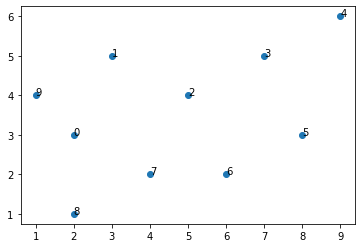

In [9]:
# Define the number of cities
num_cities = len(city_coords)

# Plot the cities on a 2D plane
x_coords = [city_coords[i][0] for i in range(num_cities)]
y_coords = [city_coords[i][1] for i in range(num_cities)]
plt.scatter(x_coords, y_coords)


for i in range(num_cities):
    plt.annotate(str(i), (city_coords[i][0], city_coords[i][1]))
plt.show()

In [10]:
def distance(city1, city2):
    x1, y1 = city1
    x2, y2 = city2
    return math.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2) 

In [11]:
# Define the TSP problem
prob = pulp.LpProblem("TSP", pulp.LpMinimize)

# Define the binary decision variables
x = pulp.LpVariable.dicts("x", [(i, j) for i in city_coords for j in city_coords if i != j], cat='Binary') 

In [15]:
# Define the objective function
prob += pulp.lpSum([distance(city_coords[i], city_coords[j]) * x[(i, j)] for i in city_coords for j in city_coords if i != j])

# Define the constraints
# Each city must be visited exactly once
for i in city_coords:
    prob += pulp.lpSum([x[(i, j)] for j in city_coords if i != j]) == 1
    prob += pulp.lpSum([x[(j, i)] for j in city_coords if i != j]) == 1

# Subtour elimination constraints
for k in city_coords:
    for S in range(2, len(city_coords)):
        for subset in itertools.combinations([i for i in city_coords if i != k], S):
            prob += pulp.lpSum([x[(i, j)] for i in subset for j in subset if i != j]) <= len(subset) - 1

/Users/utkarshgoyal/opt/anaconda3/lib/python3.9/site-packages/pulp/pulp.py:1704: UserWarning: Overwriting previously set objective.
  warnings.warn("Overwriting previously set objective.")


In [16]:
prob

TSP:
MINIMIZE
2.23606797749979*x_(0,_1) + 3.1622776601683795*x_(0,_2) + 5.385164807134504*x_(0,_3) + 7.615773105863909*x_(0,_4) + 6.0*x_(0,_5) + 4.123105625617661*x_(0,_6) + 2.23606797749979*x_(0,_7) + 2.0*x_(0,_8) + 1.4142135623730951*x_(0,_9) + 2.23606797749979*x_(1,_0) + 2.23606797749979*x_(1,_2) + 4.0*x_(1,_3) + 6.082762530298219*x_(1,_4) + 5.385164807134504*x_(1,_5) + 4.242640687119285*x_(1,_6) + 3.1622776601683795*x_(1,_7) + 4.123105625617661*x_(1,_8) + 2.23606797749979*x_(1,_9) + 3.1622776601683795*x_(2,_0) + 2.23606797749979*x_(2,_1) + 2.23606797749979*x_(2,_3) + 4.47213595499958*x_(2,_4) + 3.1622776601683795*x_(2,_5) + 2.23606797749979*x_(2,_6) + 2.23606797749979*x_(2,_7) + 4.242640687119285*x_(2,_8) + 4.0*x_(2,_9) + 5.385164807134504*x_(3,_0) + 4.0*x_(3,_1) + 2.23606797749979*x_(3,_2) + 2.23606797749979*x_(3,_4) + 2.23606797749979*x_(3,_5) + 3.1622776601683795*x_(3,_6) + 4.242640687119285*x_(3,_7) + 6.4031242374328485*x_(3,_8) + 6.082762530298219*x_(3,_9) + 7.615773105863909*

In [18]:
# Solve the problem using the CBC solver
prob.solve(pulp.PULP_CBC_CMD())

# Print the status of the solution
print("Status:", pulp.LpStatus[prob.status])

# Print the optimal objective value
print("Total distance traveled: {:.2f}".format(pulp.value(prob.objective)) ) 

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /Users/utkarshgoyal/opt/anaconda3/lib/python3.9/site-packages/pulp/solverdir/cbc/osx/64/cbc /var/folders/sc/m38hzk_90cn6t0363cr74ny40000gn/T/b30b0762603e4e058538c28d73330c9f-pulp.mps timeMode elapsed branch printingOptions all solution /var/folders/sc/m38hzk_90cn6t0363cr74ny40000gn/T/b30b0762603e4e058538c28d73330c9f-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 5045 COLUMNS
At line 97656 RHS
At line 102697 BOUNDS
At line 102788 ENDATA
Problem MODEL has 5040 rows, 90 columns and 92340 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Continuous objective value is 21.9929 - 0.02 seconds
Cgl0004I processed model has 1032 rows, 90 columns (90 integer (90 of which binary)) and 23130 elements
Cbc0038I Initial state - 0 integers unsatisfied sum - 0
Cbc0038I Solution found of 21.9929
Cbc0038I Before mini branch and bound, 90 in

Route:
0 -> 9
9 -> 1
1 -> 2
2 -> 3
3 -> 4
4 -> 5
5 -> 6
6 -> 7
7 -> 8
8 -> 0


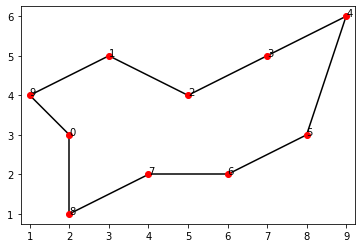

In [19]:
# Extract the solution 
solution = []
start_city = 0
next_city = start_city
while True:
    for j in range(num_cities):
        if j != next_city and x[(next_city, j)].value() == 1:
            solution.append((next_city, j))
            next_city = j
            break
    if next_city == start_city:
        break

# Print the solution
print("Route:")
for i in range(len(solution)):
    print(str(solution[i][0]) + " -> " + str(solution[i][1]))

# Plot the solution on a 2D plane
for i in range(len(solution)):
    plt.plot([city_coords[solution[i][0]][0], city_coords[solution[i][1]][0]], [city_coords[solution[i][0]][1], city_coords[solution[i][1]][1]], 'k-')
for i in range(num_cities):
    plt.plot(city_coords[i][0], city_coords[i][1], 'ro')

    plt.annotate(str(i), (city_coords[i][0], city_coords[i][1]))
plt.axis('equal')
plt.show()